In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
df = pd.read_csv('train.csv')

In [41]:
df

,date,campaign,adgroup,ad,impressions,clicks,cost,conversions,revenue
0,01-08-2020,campaign 1,adgroup 1,ad 1,24,6,0.08,0,0.00
1,01-08-2020,campaign 1,adgroup 2,ad 1,1,0,0.00,0,0.00
2,01-08-2020,campaign 1,adgroup 3,ad 1,13,4,0.04,0,0.00
3,01-08-2020,campaign 1,adgroup 4,ad 1,5,4,0.08,0,0.00
4,01-08-2020,campaign 1,adgroup 1,ad 2,247,126,1.29,4,925.71
...,...,...,...,...,...,...,...,...,...
4566,28-02-2021,campaign 1,adgroup 3,ad 55,19,6,0.07,0,0.00
4567,28-02-2021,campaign 1,adgroup 4,ad 55,1,0,0.00,0,0.00
4568,28-02-2021,campaign 1,adgroup 3,ad 56,16,8,0.12,1,93.20
4569,28-02-2021,campaign 1,adgroup 1,ad 56,37,13,0.23,0,0.00


In [42]:
df.describe()

,impressions,clicks,cost,conversions,revenue
count,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000
mean,92.635747,43.340844,2.800834,1.339094,231.865340
std,198.349737,100.164913,14.361618,5.223922,1091.742763
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,2.000000,0.040000,0.000000,0.000000
50%,16.000000,7.000000,0.210000,0.000000,0.000000
75%,84.000000,38.000000,1.350000,1.000000,92.600000
max,3239.000000,1771.000000,531.250000,94.000000,20515.410000


In [43]:
df.dtypes

date            object
campaign        object
adgroup         object
ad              object
impressions      int64
clicks           int64
cost           float64
conversions      int64
revenue        float64
dtype: object

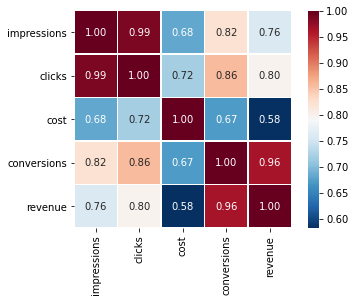

In [44]:
sns.heatmap(df._get_numeric_data().astype(float).corr(),
            square=True, cmap='RdBu_r', linewidths=.5,
            annot=True, fmt='.2f') 
plt.show()

In [45]:
df['campaign'].unique()

array(['campaign 1'], dtype=object)

In [46]:
df['date'] = pd.to_datetime(df['date'])
df.dtypes

date           datetime64[ns]
campaign               object
adgroup                object
ad                     object
impressions             int64
clicks                  int64
cost                  float64
conversions             int64
revenue               float64
dtype: object

In [47]:
df['Day'] = df['date'].dt.day
df['Month'] = df['date'].dt.month
df['Year'] = df['date'].dt.year

In [48]:
df.drop(columns=['campaign','date','ad','adgroup'],inplace=True)

In [49]:
df

,impressions,clicks,cost,conversions,revenue,Day,Month,Year
0,24,6,0.08,0,0.00,8,1,2020
1,1,0,0.00,0,0.00,8,1,2020
2,13,4,0.04,0,0.00,8,1,2020
3,5,4,0.08,0,0.00,8,1,2020
4,247,126,1.29,4,925.71,8,1,2020
...,...,...,...,...,...,...,...,...
4566,19,6,0.07,0,0.00,28,2,2021
4567,1,0,0.00,0,0.00,28,2,2021
4568,16,8,0.12,1,93.20,28,2,2021
4569,37,13,0.23,0,0.00,28,2,2021


In [50]:
df.isna().sum()

impressions    0
clicks         0
cost           0
conversions    0
revenue        0
Day            0
Month          0
Year           0
dtype: int64

In [51]:
df['CTR'] = df['clicks']/df['impressions']
df['CPC'] = df['cost']/df['clicks']
df['CPA'] = df['cost']/df['conversions']
# df['ROI'] = df['revenue']/df['cost']

In [52]:
# df = pd.get_dummies(df,columns=['adgroup'])

In [53]:
df

,impressions,clicks,cost,conversions,revenue,Day,Month,Year,CTR,CPC,CPA
0,24,6,0.08,0,0.00,8,1,2020,0.250000,0.013333,inf
1,1,0,0.00,0,0.00,8,1,2020,0.000000,NaN,NaN
2,13,4,0.04,0,0.00,8,1,2020,0.307692,0.010000,inf
3,5,4,0.08,0,0.00,8,1,2020,0.800000,0.020000,inf
4,247,126,1.29,4,925.71,8,1,2020,0.510121,0.010238,0.3225
...,...,...,...,...,...,...,...,...,...,...,...
4566,19,6,0.07,0,0.00,28,2,2021,0.315789,0.011667,inf
4567,1,0,0.00,0,0.00,28,2,2021,0.000000,NaN,NaN
4568,16,8,0.12,1,93.20,28,2,2021,0.500000,0.015000,0.1200
4569,37,13,0.23,0,0.00,28,2,2021,0.351351,0.017692,inf


In [54]:
df.replace([np.inf, -np.inf], np.nan,inplace=True)

In [55]:
df.isna().sum()

impressions       0
clicks            0
cost              0
conversions       0
revenue           0
Day               0
Month             0
Year              0
CTR               0
CPC             444
CPA            3213
dtype: int64

In [56]:
df.fillna(0,inplace=True)

In [57]:
train_X_df = df.drop(columns=['revenue'])
train_Y_df = df['revenue']

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectKBest
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor


In [59]:
from sklearn.model_selection import RandomizedSearchCV

In [60]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [61]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [62]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [63]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [64]:
rf_random.fit(train_X_df,train_Y_df)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   7.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   6.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [65]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=25, max_features='sqrt', n_estimators=1000)

In [66]:
rf_random.best_score_

-152598.77249567388

In [67]:
best_model =rf_random.best_estimator_
predicted_train_Y = best_model.predict(train_X_df)

In [68]:
from sklearn.metrics import mean_squared_error
mean_squared_error(train_Y_df, predicted_train_Y)

9168.7402627544

In [69]:
X_test = pd.read_csv('test.csv')
X_test['date'] = pd.to_datetime(X_test['date'])
X_test['Day'] = X_test['date'].dt.day
X_test['Month'] = X_test['date'].dt.month
X_test['Year'] = X_test['date'].dt.year
X_test.drop(columns=['campaign','date','ad','adgroup'],inplace=True)
# X_test = pd.get_dummies(X_test,columns=['adgroup'])
X_test['CTR'] = X_test['clicks']/X_test['impressions']
X_test['CPC'] = X_test['cost']/X_test['clicks']
X_test['CPA'] = X_test['cost']/X_test['conversions'] 
X_test.replace([np.inf, -np.inf], np.nan,inplace=True)
X_test.fillna(0,inplace=True)
X_test

,cost,impressions,clicks,conversions,Day,Month,Year,CTR,CPC,CPA
0,0.58,121,49,1,3,1,2021,0.404959,0.011837,0.58
1,0.17,22,12,0,3,1,2021,0.545455,0.014167,0.00
2,0.05,5,3,0,3,1,2021,0.600000,0.016667,0.00
3,0.01,2,1,0,3,1,2021,0.500000,0.010000,0.00
4,0.01,3,1,0,3,1,2021,0.333333,0.010000,0.00
...,...,...,...,...,...,...,...,...,...,...
313,0.01,1,1,0,15,3,2021,1.000000,0.010000,0.00
314,0.01,5,1,0,15,3,2021,0.200000,0.010000,0.00
315,0.14,25,11,0,15,3,2021,0.440000,0.012727,0.00
316,0.06,9,4,0,15,3,2021,0.444444,0.015000,0.00


In [70]:
predicted_test_Y = best_model.predict(X_test)

In [71]:
pd.DataFrame(predicted_test_Y).to_csv('predicted_test_Y.csv', header=['revenue'], index=False)